In [1]:
# Import Python libraries
#import earthpy.plot as ep
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import rioxarray as rxr

In [2]:
# Colombia Admin boundaries
dept_url = ("https://stacks.stanford.edu/file/druid:mj028ht5751/data.zip")

# Open data with geopandas
dept_gdf = gpd.read_file(dept_url)
dept_gdf

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,53,COL,Colombia,1,Amazonas,1,El Encanto,CO.AM.EE,0,None,Corregimiento Departamento,Corregimiento Departamento,None,None,"POLYGON ((-73.95367 -1.10172, -73.95241 -1.098..."
1,53,COL,Colombia,1,Amazonas,2,La Chorrera,CO.AM.LC,0,None,Corregimiento Departamento,Corregimiento Departamento,None,None,"POLYGON ((-71.98020 -1.81340, -71.96750 -1.831..."
2,53,COL,Colombia,1,Amazonas,3,La Pedrera,CO.AM.LP,0,None,Corregimiento Departamento,Corregimiento Departamento,None,None,"MULTIPOLYGON (((-72.61586 -0.92313, -72.59810 ..."
3,53,COL,Colombia,1,Amazonas,4,Leticia,CO.AM.LE,0,None,Municipio,Municipality,None,None,"POLYGON ((-70.28952 -3.83257, -70.28491 -3.822..."
4,53,COL,Colombia,1,Amazonas,5,Mirití-Paraná,CO.AM.MI,0,None,Corregimiento Departamento,Corregimiento Departamento,None,Miriti Parana,"POLYGON ((-70.21880 -0.48360, -70.20900 -0.489..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,53,COL,Colombia,32,Vichada,1061,La Primavera,CO.VD.LP,0,None,Municipio,Municipality,None,None,"POLYGON ((-68.54120 5.43700, -68.55100 5.43360..."
1061,53,COL,Colombia,32,Vichada,1062,Puerto Carreño,CO.VD.PC,0,None,Municipio,Municipality,None,None,"POLYGON ((-67.49085 6.14925, -67.49323 6.13791..."
1062,53,COL,Colombia,32,Vichada,1063,San Jose de Ocune,CO.VD,0,None,Municipio,Municipality,None,None,"POLYGON ((-71.09520 2.84550, -71.09780 3.34340..."
1063,53,COL,Colombia,32,Vichada,1064,Santa Rita,None,0,None,Municipio,Municipality,None,None,"POLYGON ((-68.90510 3.65020, -68.87930 3.92910..."


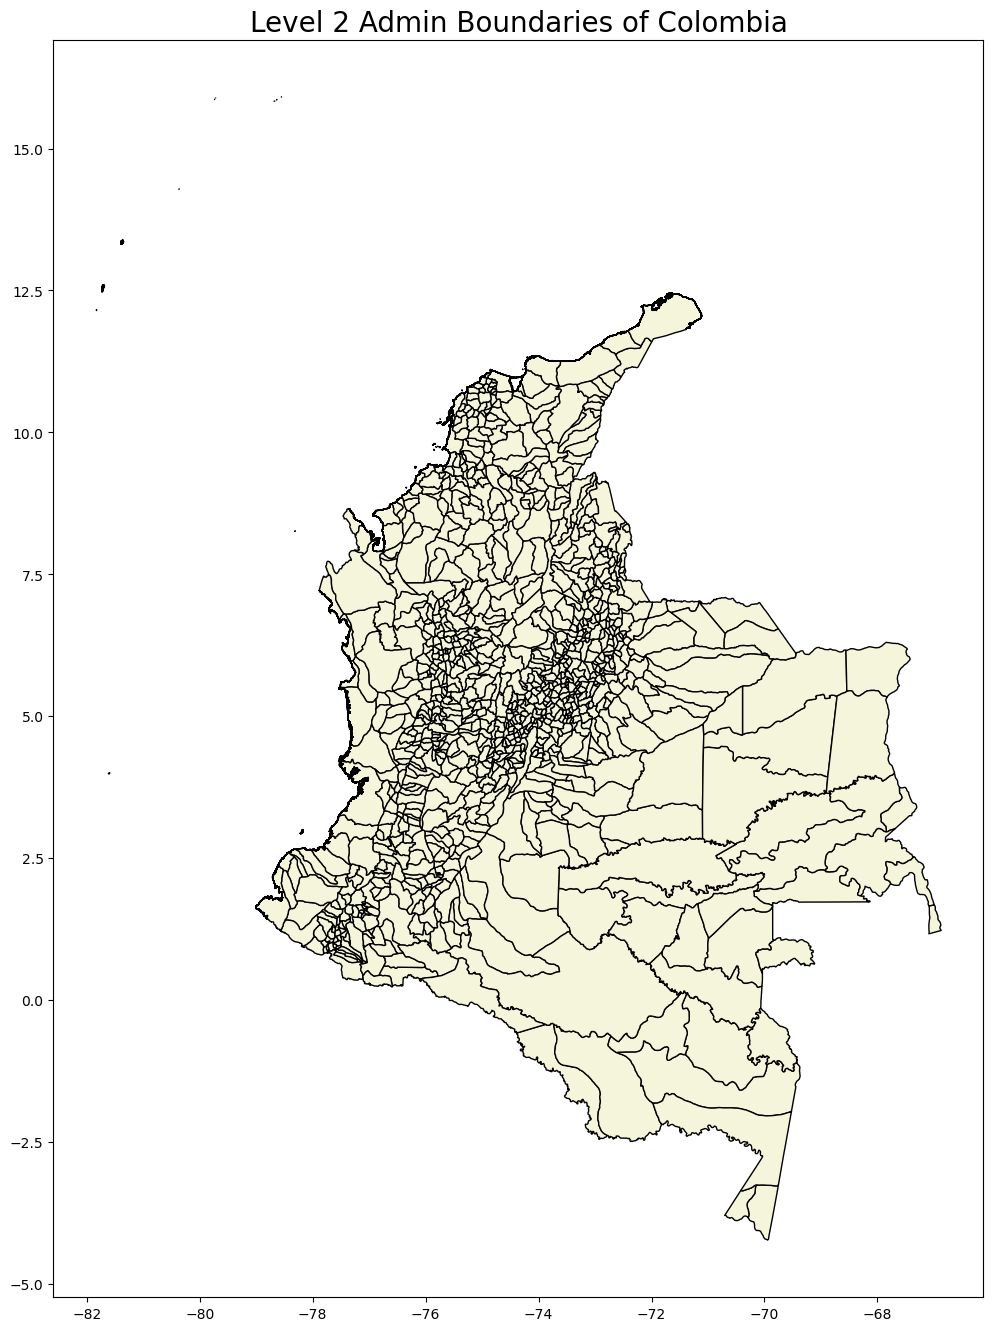

In [3]:
# Plot the geodataframe using Matplotlib
fig, ax = plt.subplots(figsize=(12,20))
#colombia_gdf.plot(ax=ax,
         #edgecolor='black',
         #color='beige')
dept_gdf.plot(ax=ax,
               edgecolor='black',
               color='beige')
plt.title('Level 2 Admin Boundaries of Colombia', fontsize=20)
plt.show()

In [17]:
# Select Puerto AsÃ­s
putumayo = dept_gdf[dept_gdf["NAME_1"].isin(["Putumayo"])]
print("The CRS of putumayo is:\n", putumayo.crs)
putumayo

pr_as = putumayo[putumayo["NAME_2"].isin(["Puerto Asís"])]
pr_as

The CRS of putumayo is:
 EPSG:4326


,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
815,53,COL,Colombia,23,Putumayo,816,Puerto Asís,CO.PU.PA,0,None,Municipio,Municipality,None,None,"POLYGON ((-76.11011 0.36900, -76.11217 0.37168..."


ValueError: aspect must be finite and positive 

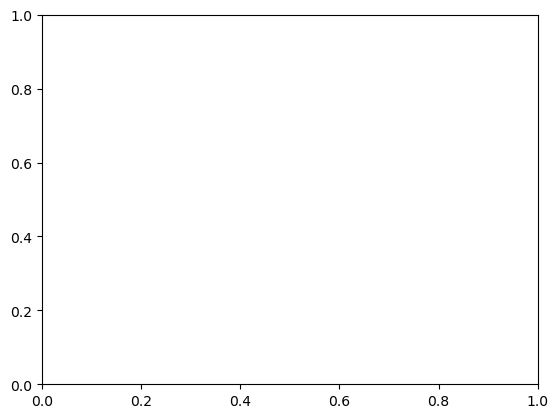

In [11]:
pr_as.plot()

In [4]:
# Select Cauca
cacua = dept_gdf[dept_gdf["NAME_1"].isin(["Cauca"])]
cacua

# Select Florencia
florencia = cacua[cacua["NAME_2"].isin(["Florencia"])]
florencia

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
416,53,COL,Colombia,11,Cauca,417,Florencia,CO.CA.FL,0,None,Municipio,Municipality,None,None,"POLYGON ((-77.07230 1.73840, -77.06600 1.72450..."


In [5]:
# Define url to 2002 raster data
raster_2002_url = ("https://data.cyverse.org/dav-anon/iplant/home/shared/"
                   "earthlab/geopark/landcover_colombian_amazon_2002.tif")

In [6]:
# Open data using rioxarray
landcover_2002_arr = rxr.open_rasterio(raster_2002_url, masked=True).squeeze()
landcover_2002_arr

<xarray.DataArray (y: 34165, x: 44745)>
[1528712925 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 1.641e+05 1.641e+05 ... 1.506e+06 1.506e+06
  * y            (y) float64 5.952e+05 5.951e+05 ... -4.297e+05 -4.298e+05
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_MAXIMUM:        7
    STATISTICS_MEAN:           1.3176634733616
    STATISTICS_MINIMUM:        0
    STATISTICS_STDDEV:         0.99581730881901
    STATISTICS_VALID_PERCENT:  34.03
    scale_factor:              1.0
    add_offset:                0.0

<Axes: >

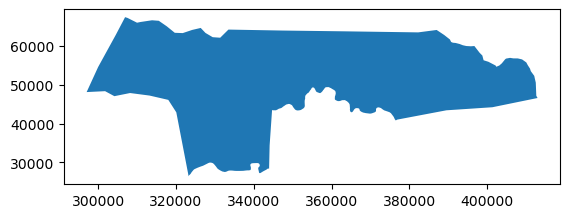

In [18]:
# Reproject Puerto Asis shp to same CRS as raster (EPSG: 32618)
pr_as_32618 = pr_as.to_crs(landcover_2002_arr.rio.crs)
pr_as_32618.plot()

In [19]:
clipped_2022 = rxr.open_rasterio(raster_2002_url, masked=True).squeeze().rio.clip(pr_as_32618.geometry, from_disk=True)
clipped_2022

<xarray.DataArray (y: 1363, x: 3862)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    band         int64 1
  * x            (x) float64 2.971e+05 2.971e+05 ... 4.129e+05 4.129e+05
  * y            (y) float64 6.732e+04 6.729e+04 ... 2.649e+04 2.646e+04
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_MAXIMUM:        7
    STATISTICS_MEAN:           1.3176634733616
    STATISTICS_MINIMUM:        0
    STATISTICS_STDDEV:         0.99581730881901
    STATISTICS_VALID_PERCENT:  34.03
    scale_factor:              1.0
    add_offset:                0.0

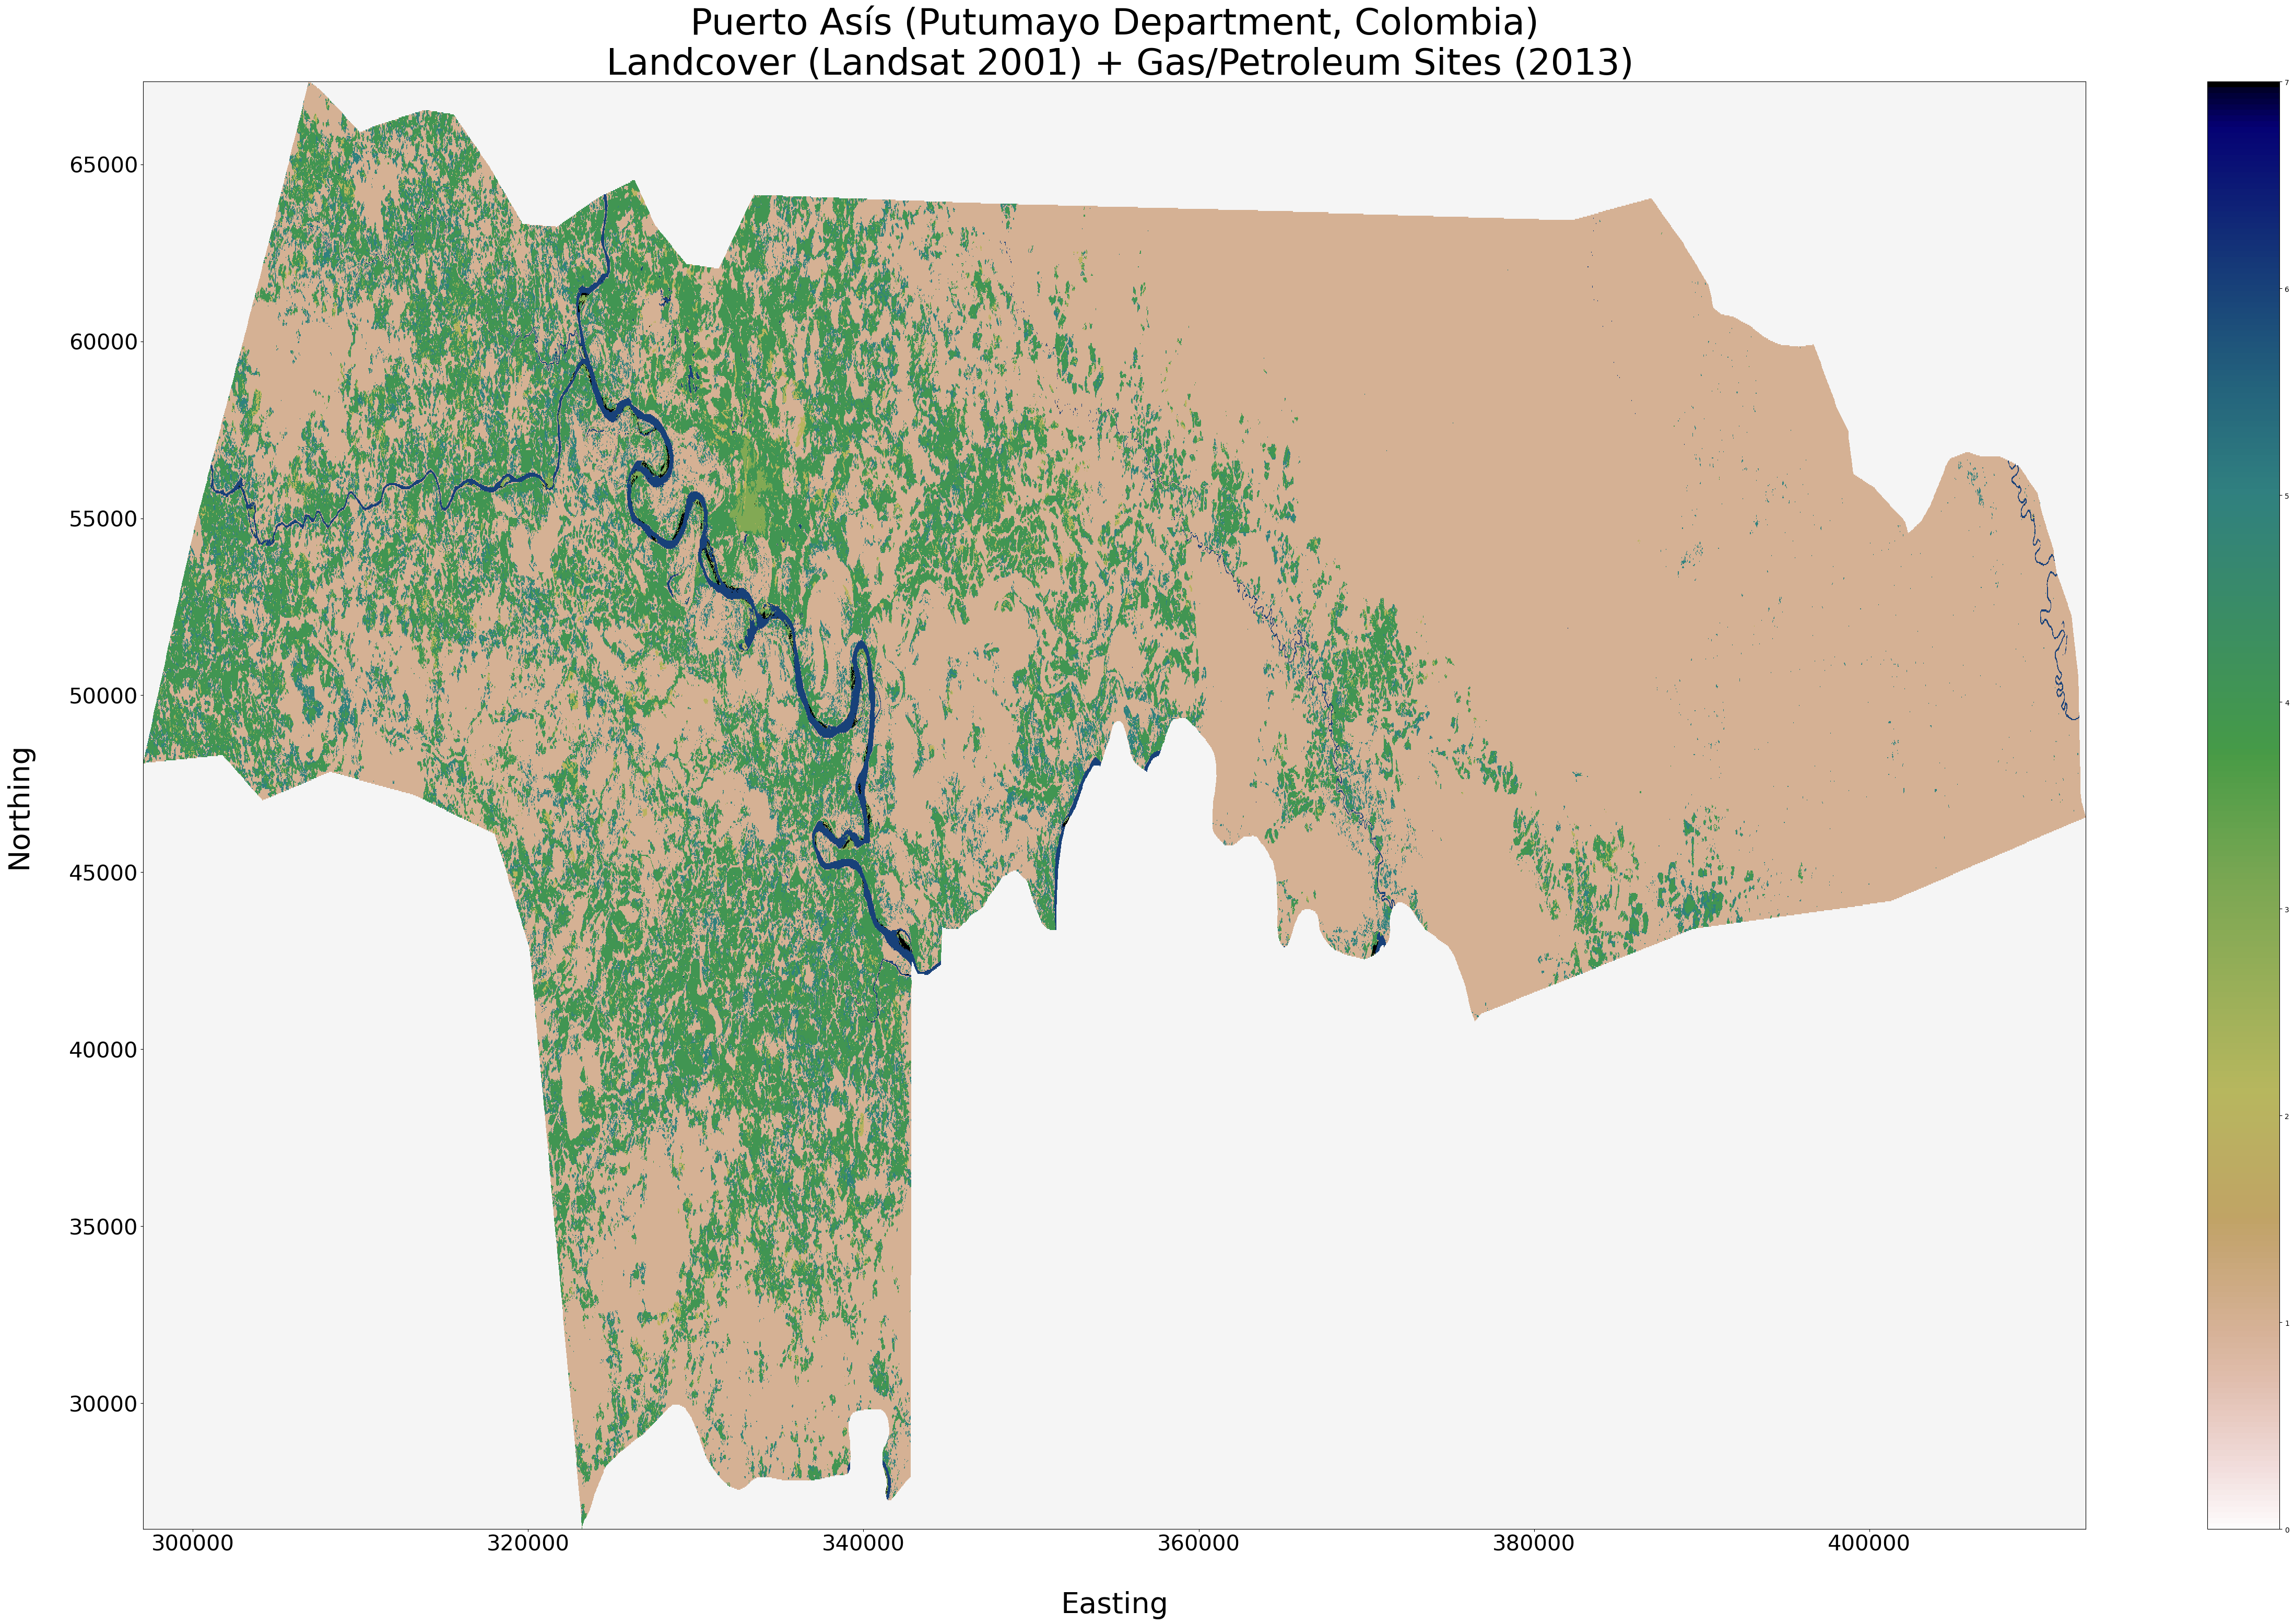

In [20]:
# Plot the raster clipped to Florencia (2002)
fig, ax = plt.subplots(figsize=(60,36))
clipped_2022.plot(ax=ax,
                          #alpha=0.8,
                          add_colorbar=True, 
                          cmap='gist_earth_r')
#pr_as_32618.plot(ax=ax,
                  #edgecolor='black',
                  #color='none')
#rivers_pr_as.plot(ax=ax,
                 #color='cornflowerblue',
                 #linewidth=5)
#roads_pr_as.plot(ax=ax,
                #color='lightgray',
                #linewidth=3)
plt.title("Puerto Asís (Putumayo Department, Colombia)\n Landcover (Landsat 2001) + Gas/Petroleum Sites (2013)",fontsize=50)
plt.xlabel("\nEasting", fontsize=40)
plt.ylabel("Northing\n", fontsize=40)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.set_facecolor("whitesmoke")
#ax.annotate('2001', xy=(380000, 30000), size=160)
plt.show()